In [156]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@File    :   assignment_5_risk.ipynb
@Time    :   2024/10/30 12:05:58
@Author  :   Guillermo Martin
@Version :   1.0
@Personal email : gfmg1992@hotmail.com
@Student email: G00438885@atu.ie
@License :   (C)Copyright 2023, Guillermo Martin
@Desc    :   None
'''


'\n@File    :   assignment_5_risk.ipynb\n@Time    :   2024/10/30 12:05:58\n@Author  :   Guillermo Martin\n@Version :   1.0\n@Personal email : gfmg1992@hotmail.com\n@Student email: G00438885@atu.ie\n@License :   (C)Copyright 2023, Guillermo Martin\n@Desc    :   None\n'

In [157]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [158]:
battles = range(0,1000)
#len(battles)

#To store results
resf= np.zeros((len(battles),2))

In [159]:
attackers_army = rd.randint(1, 100)
A_initial_army = attackers_army
A_message = "Attackers won"

In [160]:
defenders_army = rd.randint(1, 100)
D_initial_army = defenders_army
D_message = "Defenders won"

In [161]:
#a_army = rd.randint(1, 100)
#d_army = rd.randint(1, 100)

for b in battles:
    if attackers_army <= 0 or defenders_army <= 0:
        print(f"Battle stopped at battle {b}")
        if attackers_army <= 0:
            print(D_message)
        else:
            print(A_message)
        break

    # Random numbers...Sorted from high to low
    attackers = sorted(rd.sample(range(1, 6), 3), reverse=True)
    defenders = sorted(rd.sample(range(1, 6), 2), reverse=True)

    # One battle (dice comparison) per row
    res = np.array([[0, 0],
                    [0, 0]])

    # Attackers victories first column defender second column
    if attackers[0] > defenders[0]:
        res[0, 0] = 1
        defenders_army -= 1
    else:
        res[0, 1] = 1
        attackers_army -= 1

    if attackers[1] > defenders[1]:
        res[1, 0] = 1
        defenders_army -= 1
    else:
        res[1, 1] = 1
        attackers_army -= 1

    # Aggregate results
    resf[b, ] = sum(res)

Battle stopped at battle 4
Attackers won


In [162]:
# Into pd dataframe for plotting
df=pd.DataFrame({"Results":sum(resf),
             "Players": ["Attackers","Defenders"]})	

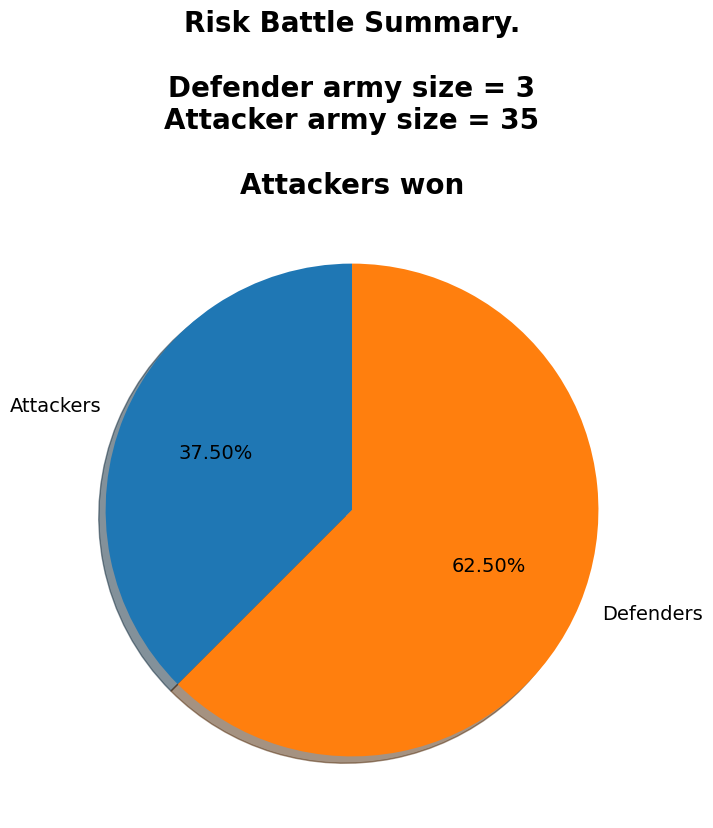

In [163]:
# Making a piechart
fig, ax = plt.subplots(figsize=(8,8)) 

Result_message = (
  D_message if attackers_army <= 0 else A_message
)

ax.pie(df['Results'],labels=df['Players'], autopct='%1.2f%%', startangle=90,shadow=True,textprops={'fontsize': 14})
plt.title(f"Risk Battle Summary.\n\nDefender army size = {D_initial_army}\nAttacker army size = {A_initial_army}\n\n{Result_message}", 
          fontweight="bold", fontdict={'fontsize': 20})
plt.show()